In [1]:
## Will test the autapse model and what each variable does.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from AQUA_class import AQUA
from plotting_functions import *
import sys
sys.path.append('AQUA_python')
from AQUA2 import aqua2


C:\Users\liamm\AppData\Local\Temp\ipykernel_31608\1897028807.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


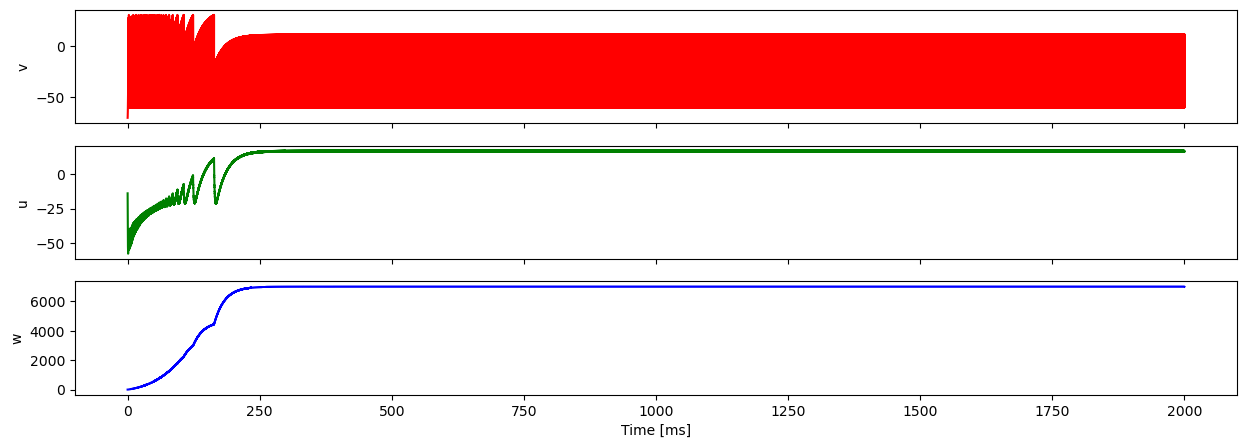

In [ ]:
# Large enough f will shift the behaviour of the system to bursting

# bistable neuron parameters

a = 1.0
b = 1.5
c = -60
d = 0

#autaptic parameters
e = 0.05     # Bacci et al. 2003
f = 7    # negative for inhibitory interneuron
tau = 3    # ms (Bacci et al. 2003)

#simulation parameters
T = 2       # s
dt = 0.01   # ms
N_iter = int(T*1000/dt)

Neuron_free = AQUA(a, b, c, d) # e, f, tau set to 0 automatically
Neuron_autapse = AQUA(a, b, c, d, e, f, tau)


#Initialization variables, X_start must contain 3-elements
x_start = np.array([-70, -14, 0]) # [v(0), u(0), w(0)]
t_start = np.array([0])

Neuron_free.Initialise(x_start, t_start)
Neuron_autapse.Initialise(x_start, t_start)

"""
I_height = 0
I_inj = I_height*np.ones(N_iter)
"""
I_pulse = 10





X_free, T_free, spike_free = Neuron_free.update_RK2(dt, N_iter, I_inj)
X_autapse, T_autapse, spike_autapse = Neuron_autapse.update_RK2(dt, N_iter, I_inj)


#split = range(int(0.18*N_iter), int(0.25*N_iter))     # Indices used in plotting
#fig, ax = plot_membrane_variables(X_free, T_free) #, split)
#fig.show()

fig2, ax2 = plot_membrane_variables(X_autapse, T_autapse)
fig2.show()


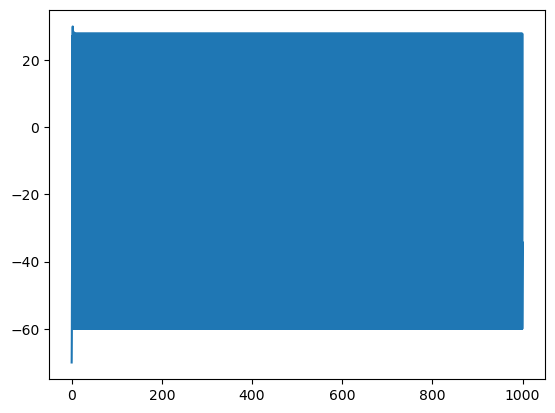

In [3]:
plt.plot(T_free[:100000], X_free[0, :100000])

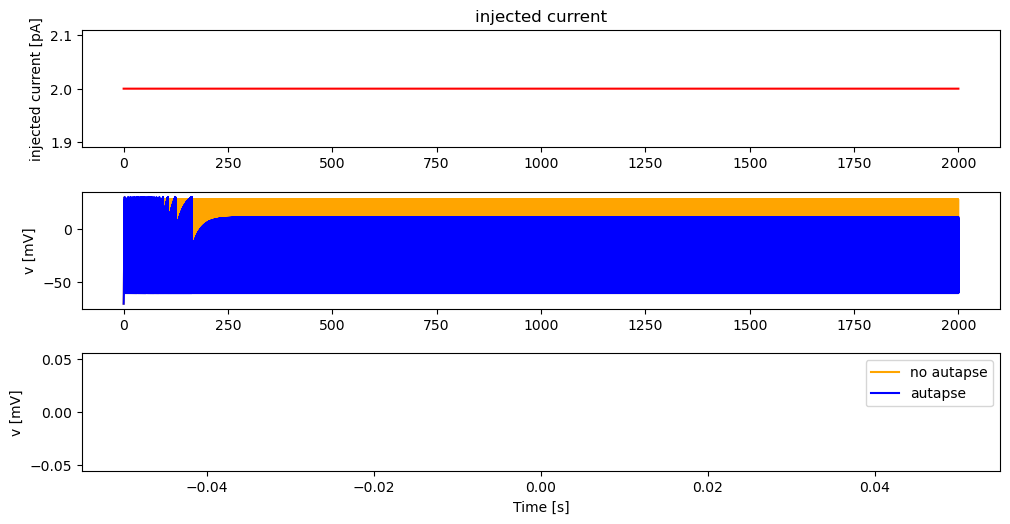

In [4]:
fig, ax = compare_trains(X_free[0, :], X_autapse[0, :], T_free, I_inj)

94510


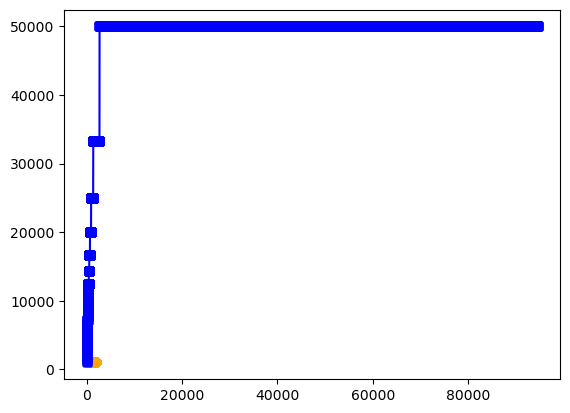

In [5]:
freq_free = 1000/(np.ediff1d(spike_free))
freq_autapse = 1000/(np.ediff1d(spike_autapse))
print(len(freq_autapse))

plt.plot(freq_free[:], c = 'orange', marker = 'o', label = 'no autapse')
plt.plot(freq_autapse[:], c = 'blue', marker = 's', label = 'autapse')
#plt.legend()

### Try plotting the 3D phase portrait



C:\Users\liamm\AppData\Local\Temp\ipykernel_31608\218910910.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


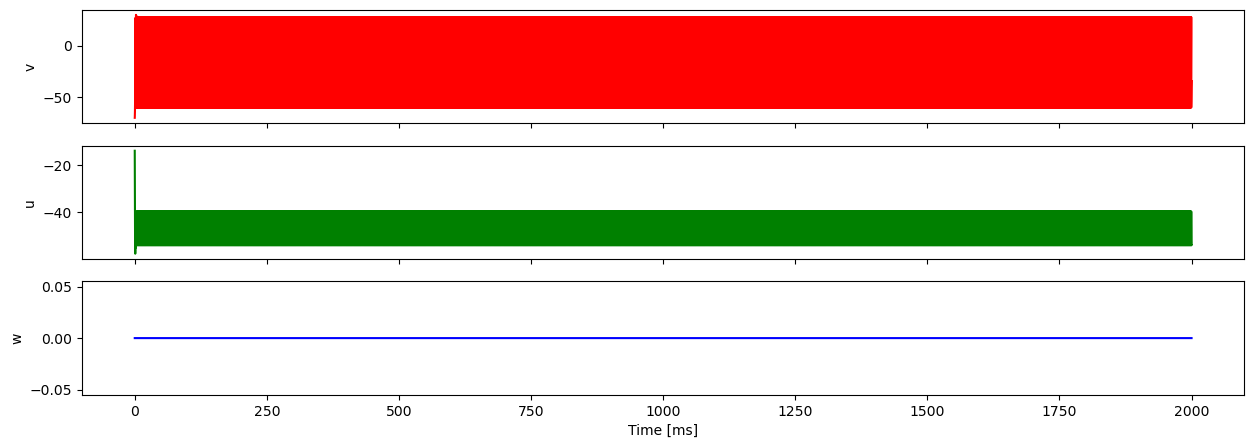

In [6]:
fig, ax = plot_membrane_variables(X_free, T_free) #, split)
fig.show()

c:\Users\liamm\Documents\PhD_autapses\Programming_files\plotting_functions.py:150: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax1.set_zlim(minW, maxW)
c:\Users\liamm\Documents\PhD_autapses\Programming_files\plotting_functions.py:163: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax2.set_ylim(minW, maxW)
c:\Users\liamm\Documents\PhD_autapses\Programming_files\plotting_functions.py:191: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax4.set_ylim(minW, maxW)
C:\Users\liamm\AppData\Local\Temp\ipykernel_31608\356278597.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


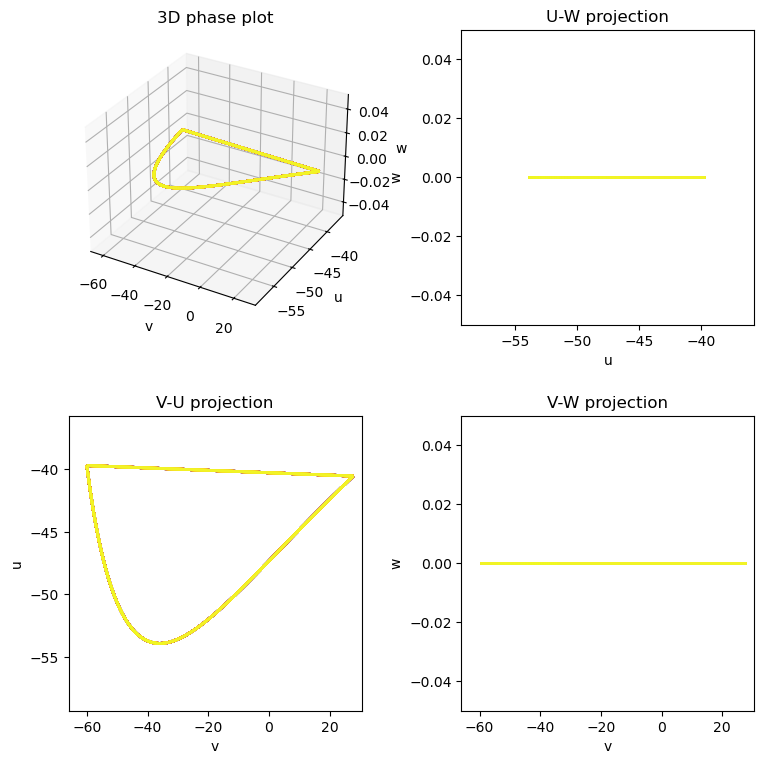

In [7]:
split1 = range(int(N_iter - 5000), N_iter)
fig = plot_3D_gradient(X_free, split1)
fig.show()

C:\Users\liamm\AppData\Local\Temp\ipykernel_31608\1742944282.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


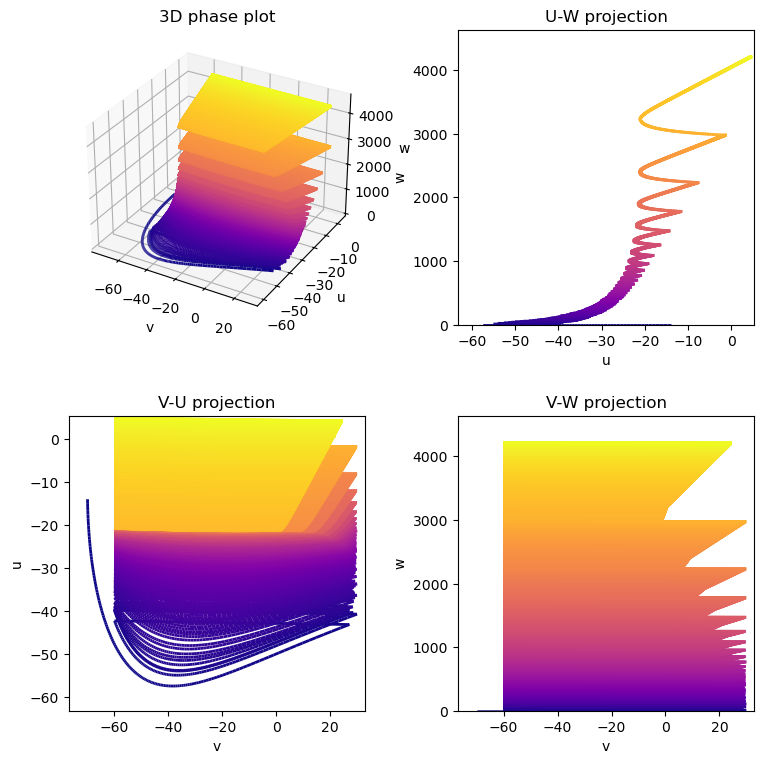

In [8]:
#split2 = range(int(N_iter/2), N_iter)
split2 = range(0, 15000)
fig2 = plot_3D_gradient(X_autapse, split2)
fig2.show()

In [9]:
pointsP = np.array([X_free[0, :], X_free[1, :], X_free[2, :]]).T.reshape(-1, 1, 3)
segmentsP = np.concatenate([pointsP[:-1], pointsP[1:]], axis = 1)
#print(np.shape(pointsP))
#sprint(pointsP)

print(np.shape(segmentsP))
print(segmentsP)

(199999, 2, 3)
[[[-70.         -14.           0.        ]
  [-69.97550992 -14.9053       0.        ]]

 [[-69.97550992 -14.9053       0.        ]
  [-69.94218699 -15.80115995   0.        ]]

 [[-69.94218699 -15.80115995   0.        ]
  [-69.90017717 -16.68754306   0.        ]]

 ...

 [[-36.40163995 -53.9344753    0.        ]
  [-35.72523546 -53.93610203   0.        ]]

 [[-35.72523546 -53.93610203   0.        ]
  [-35.03422171 -53.92750984   0.        ]]

 [[-35.03422171 -53.92750984   0.        ]
  [-34.32799606 -53.90857795   0.        ]]]


In [10]:
print(1.1*np.max([-5, -4, -2, -6, -11]))

-2.2


In [11]:
v = np.linspace(-10, 10, 100)
t = np.linspace(-10, 10, 100)
w = np.linspace(-10, 10, 100)
V_grid, W_grid = np.meshgrid(v, w)

In [12]:
I_inj = np.linspace(-10, 10, 100)
I_inj = np.reshape(I_inj, (len(I_inj), 1))

I_grid = np.tile(I_inj, 100)
#I_grid = np.reshape(I_grid, (np.shape(I_grid)[0], np.shape(I_grid)[1], 1))
#I_grid = np.tile(I_grid, 100).T
